In [73]:
import pandas as pd
from matplotlib import pyplot as plt
import statistics
import numpy as np
import seaborn as sns
import statsmodels.formula.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [1]:
import pandas as pd
behav = pd.read_sas(r'C:\Users\tkste\OneDrive\Documents\LLCP2019.XPT')

C:\Users\tkste\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sas\sas_xport.py:475: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[x] = v


In [2]:
print(behav['WEIGHT2'].head(10))

0    154.0
1    108.0
2    190.0
3    122.0
4    110.0
5      NaN
6    250.0
7    240.0
8    172.0
9     94.0
Name: WEIGHT2, dtype: float64


In [3]:
behav.rename(columns={behav.columns[31]: "Female" ,
                      behav.columns[88]: "Avedrnk",
                      behav.columns[274]: "Age",
                      behav.columns[279]: "BMI",
                      behav.columns[309]: "Activ"}, inplace = True)


newbehav = behav[behav["Avedrnk"] < 76]
newbehav = newbehav[(newbehav["Activ"] > -1) & (newbehav["Activ"] < 7000)]
newbehav = newbehav[(newbehav["BMI"] > 0) & (newbehav["BMI"] < 9999)]


In [4]:
print(behav['Avedrnk'].head(15))
print(behav['Age'].head(15))
print(newbehav['Avedrnk'].head(15))
print(newbehav['Age'].head(15))

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     1.0
7     1.0
8     NaN
9     NaN
10    1.0
11    NaN
12    NaN
13    2.0
14    NaN
Name: Avedrnk, dtype: float64
0     80.0
1     70.0
2     67.0
3     80.0
4     80.0
5     69.0
6     71.0
7     72.0
8     77.0
9     71.0
10    70.0
11    55.0
12    80.0
13    76.0
14    72.0
Name: Age, dtype: float64
6     1.0
7     1.0
10    1.0
13    2.0
20    1.0
22    4.0
25    2.0
34    2.0
37    2.0
39    1.0
40    2.0
45    3.0
46    4.0
62    1.0
63    2.0
Name: Avedrnk, dtype: float64
6     71.0
7     72.0
10    70.0
13    76.0
20    68.0
22    68.0
25    44.0
34    38.0
37    70.0
39    50.0
40    62.0
45    53.0
46    61.0
62    49.0
63    78.0
Name: Age, dtype: float64


In [5]:
print(newbehav['BMI'].head(10))
print(newbehav['Activ'].head(10))

6     3298.0
7     3081.0
10    2231.0
13    2579.0
20    3090.0
22    2658.0
25    2271.0
34    3298.0
37    3390.0
39    2292.0
Name: BMI, dtype: float64
6      270.0
7      960.0
10     468.0
13    1920.0
20     840.0
22     350.0
25      60.0
34     308.0
37     180.0
39      92.0
Name: Activ, dtype: float64


In [6]:
newbehav["Activ"] = newbehav["Activ"]/7
newbehav["BMI"] = newbehav["BMI"]/100
newbehav["Activ"] = round(newbehav["Activ"], 2)

print(newbehav['BMI'].head(10))
print(newbehav['Activ'].head(10))

6     32.98
7     30.81
10    22.31
13    25.79
20    30.90
22    26.58
25    22.71
34    32.98
37    33.90
39    22.92
Name: BMI, dtype: float64
6      38.57
7     137.14
10     66.86
13    274.29
20    120.00
22     50.00
25      8.57
34     44.00
37     25.71
39     13.14
Name: Activ, dtype: float64


In [7]:
print(type(newbehav["Female"]))
print(type(newbehav["Avedrnk"]))
print(type(newbehav["Age"]))
print(type(newbehav["Activ"]))
print(type(newbehav["BMI"]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [8]:
newbehav["Female"] = newbehav["Female"].replace(1,0)
newbehav["Female"] = newbehav["Female"].replace(2,1)

In [9]:
print(newbehav['Female'].head(10))

6     0.0
7     0.0
10    1.0
13    0.0
20    1.0
22    0.0
25    1.0
34    0.0
37    0.0
39    1.0
Name: Female, dtype: float64


In [10]:
# Creating a new data set with just these variables
subnewbehav = newbehav[["Female","Avedrnk","Age","Activ","BMI"]]
print(subnewbehav.head(10))

    Female  Avedrnk   Age   Activ    BMI
6      0.0      1.0  71.0   38.57  32.98
7      0.0      1.0  72.0  137.14  30.81
10     1.0      1.0  70.0   66.86  22.31
13     0.0      2.0  76.0  274.29  25.79
20     1.0      1.0  68.0  120.00  30.90
22     0.0      4.0  68.0   50.00  26.58
25     1.0      2.0  44.0    8.57  22.71
34     0.0      2.0  38.0   44.00  32.98
37     0.0      2.0  70.0   25.71  33.90
39     1.0      1.0  50.0   13.14  22.92


In [11]:
subnewbehav[["Avedrnk","Age","Activ","BMI"]].describe()

,Avedrnk,Age,Activ,BMI
count,144455.000000,144455.000000,144455.000000,144455.000000
mean,2.211194,52.691059,74.555711,27.536042
std,2.279203,17.451755,104.393932,5.596558
min,1.000000,18.000000,0.000000,12.050000
25%,1.000000,38.000000,17.860000,23.710000
50%,2.000000,55.000000,40.570000,26.610000
75%,2.000000,67.000000,85.710000,30.300000
max,72.000000,80.000000,998.570000,98.700000


In [12]:
# If I only wanted specific columns then I would do subnewbehav[["variable1","variable2"]].groupby("Female").describe().T
round(subnewbehav.groupby("Female").describe(), 2).T

Female              0.0       1.0
Avedrnk count  75048.00  69407.00
        mean       2.57      1.82
        std        2.64      1.72
        min        1.00      1.00
        25%        1.00      1.00
        50%        2.00      1.00
        75%        3.00      2.00
        max       72.00     60.00
Age     count  75048.00  69407.00
        mean      52.21     53.21
        std       17.74     17.12
        min       18.00     18.00
        25%       37.00     39.00
        50%       55.00     55.00
        75%       67.00     67.00
        max       80.00     80.00
Activ   count  75048.00  69407.00
        mean      79.76     68.93
        std      111.00     96.43
        min        0.00      0.00
        25%       18.71     17.14
        50%       42.86     38.57
        75%       90.86     77.14
        max      998.57    994.29
BMI     count  75048.00  69407.00
        mean      28.04     26.99
        std        5.15      5.99
        min       12.16     12.05
        25%       24.41     22.80
        50%       27.26     25.79
        75%       30.54     29.95
        max       92.22     98.70

In [13]:
# Here, zero is male and 1 is female
# We created a new data frame and then renamed the column Female and changed 0 to Male and 1 to Female
# This way, we have better column titles than the ones in the previous table which are 0 and 1
subnewbehav2 = subnewbehav
subnewbehav2.rename(columns = {subnewbehav2.columns[0]: "Gender"}, inplace = True)
print(subnewbehav2.head(10))

subnewbehav2["Gender"] = subnewbehav2["Gender"].replace(0,"Male")
subnewbehav2["Gender"] = subnewbehav2["Gender"].replace(1,"Female")
print(subnewbehav2.head(10))

    Gender  Avedrnk   Age   Activ    BMI
6      0.0      1.0  71.0   38.57  32.98
7      0.0      1.0  72.0  137.14  30.81
10     1.0      1.0  70.0   66.86  22.31
13     0.0      2.0  76.0  274.29  25.79
20     1.0      1.0  68.0  120.00  30.90
22     0.0      4.0  68.0   50.00  26.58
25     1.0      2.0  44.0    8.57  22.71
34     0.0      2.0  38.0   44.00  32.98
37     0.0      2.0  70.0   25.71  33.90
39     1.0      1.0  50.0   13.14  22.92
    Gender  Avedrnk   Age   Activ    BMI
6     Male      1.0  71.0   38.57  32.98
7     Male      1.0  72.0  137.14  30.81
10  Female      1.0  70.0   66.86  22.31
13    Male      2.0  76.0  274.29  25.79
20  Female      1.0  68.0  120.00  30.90
22    Male      4.0  68.0   50.00  26.58
25  Female      2.0  44.0    8.57  22.71
34    Male      2.0  38.0   44.00  32.98
37    Male      2.0  70.0   25.71  33.90
39  Female      1.0  50.0   13.14  22.92


C:\Users\tkste\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\Users\tkste\AppData\Local\Temp/ipykernel_14688/3903042883.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subnewbehav2["Gender"] = subnewbehav2["Gender"].replace(0,"Male")
C:\Users\tkste\AppData\Local\Temp/ipykernel_14688/3903042883.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [14]:
round(subnewbehav2.groupby("Gender").describe(), 2).T

Gender           Female      Male
Avedrnk count  69407.00  75048.00
        mean       1.82      2.57
        std        1.72      2.64
        min        1.00      1.00
        25%        1.00      1.00
        50%        1.00      2.00
        75%        2.00      3.00
        max       60.00     72.00
Age     count  69407.00  75048.00
        mean      53.21     52.21
        std       17.12     17.74
        min       18.00     18.00
        25%       39.00     37.00
        50%       55.00     55.00
        75%       67.00     67.00
        max       80.00     80.00
Activ   count  69407.00  75048.00
        mean      68.93     79.76
        std       96.43    111.00
        min        0.00      0.00
        25%       17.14     18.71
        50%       38.57     42.86
        75%       77.14     90.86
        max      994.29    998.57
BMI     count  69407.00  75048.00
        mean      26.99     28.04
        std        5.99      5.15
        min       12.05     12.16
        25%       22.80     24.41
        50%       25.79     27.26
        75%       29.95     30.54
        max       98.70     92.22

Text(0, 0.5, 'Count of BMI')

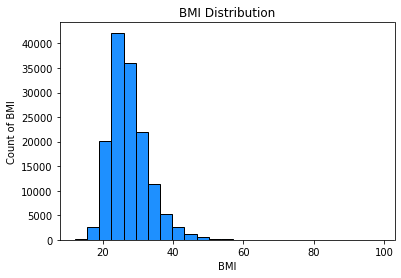

In [15]:
from matplotlib import pyplot as plt

plt.hist(subnewbehav["BMI"], color = 'dodgerblue', edgecolor = 'black',
         bins = int(25))

plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count of BMI')

Text(0, 0.5, 'Count of Average Drinks')

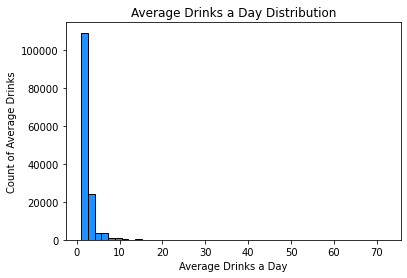

In [16]:
plt.hist(subnewbehav["Avedrnk"], color = 'dodgerblue', edgecolor = 'black',
         bins = int(45))

plt.title('Average Drinks a Day Distribution')
plt.xlabel('Average Drinks a Day')
plt.ylabel('Count of Average Drinks')

Text(0, 0.5, 'Count of Average Drinks')

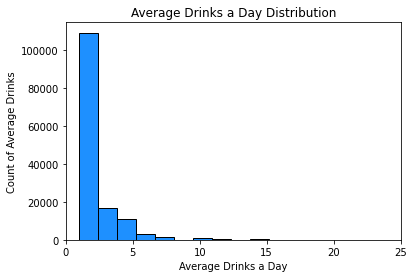

In [17]:
# Here we are limiting the x-axis to show the variation in average drinks a bit more clearly
# However, this is excluding the values that are present at the 25 and above mark so you should never just include this histogram
# This is more just to show how to use the plt.xlim function

plt.hist(subnewbehav["Avedrnk"], color = 'dodgerblue', edgecolor = 'black',
         bins = int(50))

plt.xlim(0,25)
plt.title('Average Drinks a Day Distribution')
plt.xlabel('Average Drinks a Day')
plt.ylabel('Count of Average Drinks')

Text(0, 0.5, 'Count of Age')

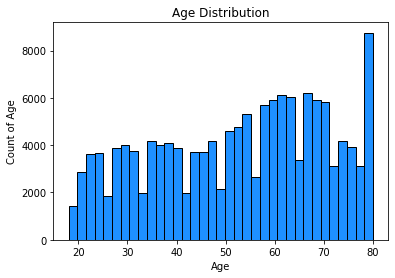

In [18]:
plt.hist(subnewbehav["Age"], color = 'dodgerblue', edgecolor = 'black',
         bins = int(35))

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count of Age')

Text(0, 0.5, 'Count of Activity')

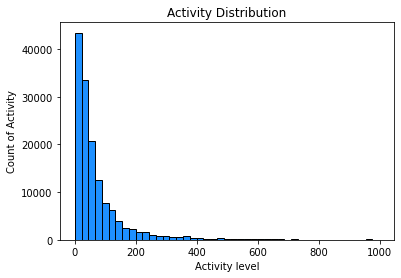

In [19]:
plt.hist(subnewbehav["Activ"], color = 'dodgerblue', edgecolor = 'black',
         bins = int(45))

plt.title('Activity Distribution')
plt.xlabel('Activity level')
plt.ylabel('Count of Activity')

In [20]:
# This output tells us how many numbers are greater than 800 in the activ variable
k = 800
count = 0
for i in subnewbehav["Activ"] : 
    if i > k :
        count = count + 1

print("the numbers greater than 800 in Activ : " + str(count))
print("the percent greater than 800 in Activ : " + str(count/144455) + "%")
# 144455 is the amount of observations in the subnewbehav data set

the numbers greater than 800 in Activ : 296
the percent greater than 800 in Activ : 0.002049081028694057%


In [21]:
# This just shows us the mean of the activ variable, not needed but good practice
import statistics

print("Mean of Activ is :", statistics.mean(subnewbehav["Activ"]))

# This shows us the mean of the activ variable if we had nan's in the variable
# Since we don't have any nan's its good we got the same number
import numpy as np

print("Mean of Activ is :", np.nanmean(subnewbehav["Activ"]))

Mean of Activ is : 74.55571070575611
Mean of Activ is : 74.5557107057561


Text(0, 0.5, 'BMI')

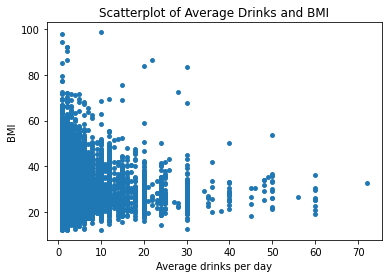

In [22]:
plt.scatter(subnewbehav["Avedrnk"], subnewbehav["BMI"], alpha = 1, s = 15)

plt.title('Scatterplot of Average Drinks and BMI')
plt.xlabel('Average drinks per day')
plt.ylabel('BMI')

# Still need to add a regression line to this

Text(0, 0.5, 'BMI')

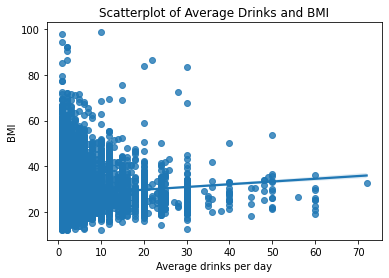

In [23]:
# This creates a scatterplot of these two variables but also adds a regression line automatically

import seaborn as sns

sns.regplot(x = subnewbehav['Avedrnk'], y = subnewbehav['BMI'])

plt.title('Scatterplot of Average Drinks and BMI')
plt.xlabel('Average drinks per day')
plt.ylabel('BMI')

In [26]:
# Rearrangning the data so I can make an overlapping density plot

den_data = subnewbehav[["Gender","BMI"]]
print(den_data.head(10))

# This transforms the data into a wide format so I can use it in a density plot

den_data = den_data.pivot(columns = 'Gender', values = 'BMI')
print(den_data.head(10))

    Gender    BMI
6     Male  32.98
7     Male  30.81
10  Female  22.31
13    Male  25.79
20  Female  30.90
22    Male  26.58
25  Female  22.71
34    Male  32.98
37    Male  33.90
39  Female  22.92
Gender  Female   Male
6          NaN  32.98
7          NaN  30.81
10       22.31    NaN
13         NaN  25.79
20       30.90    NaN
22         NaN  26.58
25       22.71    NaN
34         NaN  32.98
37         NaN  33.90
39       22.92    NaN


Text(0.5, 0, 'BMI')

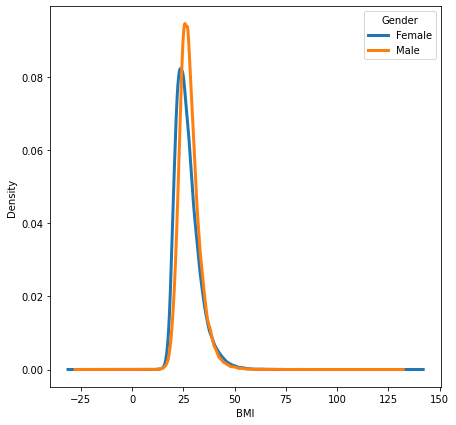

In [29]:
# Creating an overlapping density plot

den_data.plot.density(figsize = (7, 7), linewidth = 3)

plt.xlabel("BMI")

In [32]:
# Ensuring that the data is the same as before even after transposing it
# I wasn't sure it was the same because the overlapping density plot had larger x-values than the data had
# However, the data is the same so I will limit the x-axis in the next plot

round(den_data.describe(), 2)

Gender,Female,Male
count,69407.00,75048.00
mean,26.99,28.04
std,5.99,5.15
min,12.05,12.16
25%,22.80,24.41
50%,25.79,27.26
75%,29.95,30.54
max,98.70,92.22


Text(0.5, 1.0, 'Overlapping density plot of Gender and BMI')

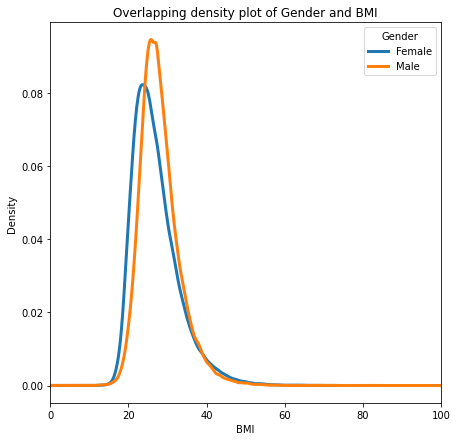

In [34]:
# Creating an overlapping density plot and limiting the x-axis

den_data.plot.density(figsize = (7, 7), linewidth = 3)

plt.xlim(0,100)
plt.xlabel("BMI")
plt.title("Overlapping density plot of Gender and BMI")

Text(0.5, 6.79999999999999, 'BMI')

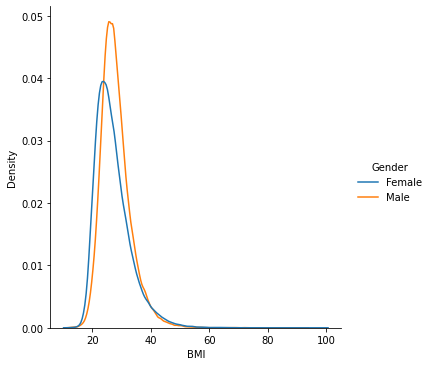

In [38]:
sns.displot(den_data, kind = "kde")

plt.xlabel('BMI')

In [40]:
# Creating a correlation matrix

coeffmatrix = subnewbehav.corr()
print(coeffmatrix)

          Avedrnk       Age     Activ       BMI
Avedrnk  1.000000 -0.210073  0.015560  0.048817
Age     -0.210073  1.000000  0.173526 -0.008785
Activ    0.015560  0.173526  1.000000 -0.057337
BMI      0.048817 -0.008785 -0.057337  1.000000


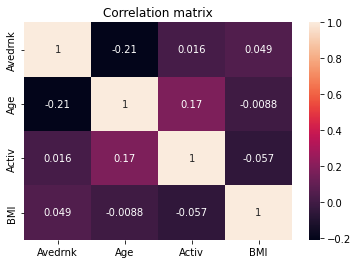

In [42]:
# Creating a heatmap of the data

sns.heatmap(coeffmatrix, annot = True)

plt.title("Correlation matrix")
plt.show()

In [52]:
# Running the regression

import statsmodels.formula.api as sm

reg1 = sm.ols(formula = "BMI ~ Avedrnk + Age + Activ + Gender", data = subnewbehav).fit()
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     515.0
Date:                Wed, 19 Jan 2022   Prob (F-statistic):               0.00
Time:                        18:42:52   Log-Likelihood:            -4.5272e+05
No. Observations:              144455   AIC:                         9.055e+05
Df Residuals:                  144450   BIC:                         9.055e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         26.8385      0.054    498.

<AxesSubplot:xlabel='Avedrnk', ylabel='BMI'>

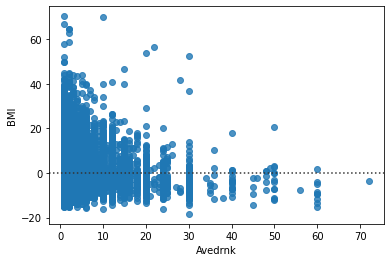

In [61]:
# Creating regression plots
# Trying to create a residuals vs. fitted plot but it isnt really working
# It's much easier to do in R

# This just compares BMI and Avedrnk
sns.residplot(y = subnewbehav.loc[:,["BMI"]], x = subnewbehav.loc[:,['Avedrnk']])

In [64]:
# Creating a grouped Average Drink variable
subnewbehav3 = subnewbehav
subnewbehav3['Avedrnk2'] = pd.cut(subnewbehav3['Avedrnk'], bins=[0, 2, 4, float('Inf')], labels=['low', 'medium', 'high'])
print(subnewbehav3['Avedrnk2'].head(20))

6        low
7        low
10       low
13       low
20       low
22    medium
25       low
34       low
37       low
39       low
40       low
45    medium
46    medium
62       low
63       low
65    medium
76       low
80       low
88      high
89       low
Name: Avedrnk2, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']


C:\Users\tkste\AppData\Local\Temp/ipykernel_14688/3374974271.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subnewbehav3['Avedrnk2'] = pd.cut(subnewbehav3['Avedrnk'], bins=[0, 2, 4, float('Inf')], labels=['low', 'medium', 'high'])


In [68]:
# Creating a new data set so we can have the same variable name as in previous regression
# We can't have the same variable name in the same data set because the regression wouldn't know which one to pick

Ordinalbehav = subnewbehav3[["Gender","Avedrnk2","Age","Activ","BMI"]]
print(Ordinalbehav.head(10))

Ordinalbehav.rename(columns={Ordinalbehav.columns[1]: "Avedrnk"}, inplace = True)
print(Ordinalbehav.head(10))

    Gender Avedrnk2   Age   Activ    BMI
6     Male      low  71.0   38.57  32.98
7     Male      low  72.0  137.14  30.81
10  Female      low  70.0   66.86  22.31
13    Male      low  76.0  274.29  25.79
20  Female      low  68.0  120.00  30.90
22    Male   medium  68.0   50.00  26.58
25  Female      low  44.0    8.57  22.71
34    Male      low  38.0   44.00  32.98
37    Male      low  70.0   25.71  33.90
39  Female      low  50.0   13.14  22.92
    Gender Avedrnk   Age   Activ    BMI
6     Male     low  71.0   38.57  32.98
7     Male     low  72.0  137.14  30.81
10  Female     low  70.0   66.86  22.31
13    Male     low  76.0  274.29  25.79
20  Female     low  68.0  120.00  30.90
22    Male  medium  68.0   50.00  26.58
25  Female     low  44.0    8.57  22.71
34    Male     low  38.0   44.00  32.98
37    Male     low  70.0   25.71  33.90
39  Female     low  50.0   13.14  22.92


C:\Users\tkste\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [69]:
# Running the grouped regression

reg2 = sm.ols(formula = "BMI ~ Avedrnk + Age + Activ + Gender", data = Ordinalbehav).fit()
print(reg2.summary())

# Interpretation: Based on the sample data, one with a high number of drinks a day has a 0.72 higher BMI than one with a low number of drinks a day

                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     420.2
Date:                Wed, 19 Jan 2022   Prob (F-statistic):               0.00
Time:                        19:38:38   Log-Likelihood:            -4.5270e+05
No. Observations:              144455   AIC:                         9.054e+05
Df Residuals:                  144449   BIC:                         9.055e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            26.8718      0.05

In [72]:
# Doing a Breusch Pagan test to see if heterskedasticty is present in the model (likley present due to residuals vs fitted)

from statsmodels.compat import lzip
import statsmodels.stats.api as sms

names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(reg2.resid, reg2.model.exog)

lzip(names, test)

# Since the p-value is less than 0.05 we have heteroskedasticity in the model

[('Lagrange multiplier statistic', 1386.322671704239),
 ('p-value', 1.2659353845362331e-297),
 ('f-value', 279.9395749574047),
 ('f p-value', 4.582816022951307e-299)]